In [7]:
# Initialisation(s)

import os, sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    # Running in Google CoLab
    from google.colab import drive
    drive.mount('/content/gdrive/')
    global_prefix = '/content/gdrive/MyDrive/Colab Notebooks/Jupyter-Puzzles/python/programmationContraintes/cpmpy/explications/demineur/'
    os.chdir(global_prefix)
else:
    # Not running in Google CoLab
    global_prefix = os.getcwd().replace('\\','/') + '/'

sys.path.append(f'{global_prefix}../../../../outils')
import displayImages

%run ../explications.ipynb

# [Démineur](https://www.janko.at/Raetsel/Minesweeper/)

Soit un tableau de $n\times m$ cases. Chaque case contient ou non une mine et il s'agit de déterminer les emplacements de ces mines.
Pour cela, on dispose d'un autre tableau $n\times m$. Une case de ce tableau est vide ou contient un entier $p\geqslant0$. Dans ce dernier cas,
$p$  désigne le nombre de mines situées parmi les $\leqslant8$ cases voisines, étant entendu que la case contenant $p$ elle même ne contient pas de mine.

On suppose qu'il y a une unique solution (comme pour le Sudoku).

## Génération des explications
### Modélisation

In [8]:
def model_minesweeper(given):
    """
    retourne un triplet vars, facts, constraints
    utilisable dans EXPLANATION
    """
    # cellule indéterminée
    x = -1
    # Dimensions of the problem
    nrow = len(given)
    ncol = len(given[0])

    # Model Variables
    mines = intvar(0,1,shape = (nrow, ncol), name = "mines")
    
    # contraintes
    facts = []
    constraints = []
    for i in range(nrow):
        for j in range(ncol):
            if given[i,j] != x:
                facts.append(mines[i,j] == 0)
                constraints.append(sum([mines[i+a,j+b] for a in [-1,0,1] for b in [-1,0,1] 
                                        if i+a >= 0 and j+b >= 0 and i+a < nrow and j+b < ncol]) == given[i,j])

    return mines, facts, constraints

### Exemples

In [9]:
x = -1

given6 = np.array([
    [ x, x, x, x, x, x],
    [ x, 2, 2, 2, 2, x],
    [ x, 2, 0, 0, 2, x],
    [ x, 2, 0, 0, 2, x],
    [ x, 2, 2, 2, 2, x],
    [ x, x, x, x, x, x]
    ])

explanation6 = EXPLANATION(*model_minesweeper(given6))

given8 = np.array([
    [0,x,x,1,x,1,x,x],
    [x,x,x,2,3,x,1,x],
    [x,1,x,x,x,x,x,x],
    [x,x,1,1,x,x,2,x],
    [1,x,x,x,x,1,x,x],
    [x,x,3,x,1,x,x,2],
    [x,2,x,x,x,x,x,1],
    [0,x,1,x,x,2,x,x]
])

explanation8 = EXPLANATION(*model_minesweeper(given8))

given9 = np.array([
    [2,x,x,x,2,x,x,x,2],
    [x,4,x,4,x,3,x,4,x],
    [x,x,4,x,x,x,1,x,x],
    [x,4,x,3,x,3,x,4,x],
    [2,x,x,x,x,x,x,x,2],
    [x,5,x,4,x,5,x,4,x],
    [x,x,3,x,x,x,3,x,x],
    [x,4,x,3,x,5,x,6,x],
    [2,x,x,x,1,x,x,x,2]
])

explanation9 = EXPLANATION(*model_minesweeper(given9))

given10 = np.array([
    [x,x,x,x,x,x,x,x,x,x],
    [x,3,2,x,3,3,3,2,2,x],
    [x,2,x,3,x,x,x,x,2,x],
    [x,2,x,x,1,1,x,3,x,x],
    [x,3,x,3,x,x,1,x,3,x],
    [x,3,x,3,x,x,1,x,3,x],
    [x,x,2,x,1,1,x,x,3,x],
    [x,3,x,x,x,x,2,x,2,x],
    [x,3,2,3,3,3,x,2,2,x],
    [x,x,x,x,x,x,x,x,x,x]
])

explanation10 = EXPLANATION(*model_minesweeper(given10))

given15 = np.array([
    [1,x,x,x,x,x,x,1,x,x,x,x,x,x,1],
    [x,x,1,1,1,1,1,x,2,2,2,2,2,x,x],
    [x,2,2,x,x,x,x,x,x,x,x,x,2,4,x],
    [x,2,x,x,2,2,2,2,2,2,2,2,x,4,x],
    [x,2,x,3,x,x,x,x,x,x,x,3,x,4,x],
    [x,2,x,3,x,3,3,3,3,3,x,3,x,4,x],
    [x,2,x,3,x,3,x,x,x,3,x,3,x,4,x],
    [2,x,x,3,x,3,x,5,x,3,x,3,x,x,2],
    [x,3,x,3,x,3,x,x,x,3,x,3,x,3,x],
    [x,3,x,3,x,3,3,3,3,3,x,3,x,3,x],
    [x,3,x,3,x,x,x,x,x,x,x,3,x,3,x],
    [x,3,x,3,4,4,4,4,4,4,4,x,x,3,x],
    [x,3,3,x,x,x,x,x,x,x,x,x,3,3,x],
    [x,x,3,3,3,3,3,x,3,3,3,3,3,x,x],
    [1,x,x,x,x,x,x,1,x,x,x,x,x,x,2]
])

explanation15 = EXPLANATION(*model_minesweeper(given15))

### Solution

In [10]:
explanation6.solve()

array([[0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0]])

### Génération d'une explication

In [11]:
_ = explanation6.explain()


Facts (E)

Constraints (S)
   sum([mines[1,2], mines[1,3], mines[1,4], mines[2,2], mines[2,3], mines[2,4], mines[3,2], mines[3,3], mines[3,4]]) == 0
   sum([mines[1,3], mines[1,4], mines[1,5], mines[2,3], mines[2,4], mines[2,5], mines[3,3], mines[3,4], mines[3,5]]) == 2
   sum([mines[0,3], mines[0,4], mines[0,5], mines[1,3], mines[1,4], mines[1,5], mines[2,3], mines[2,4], mines[2,5]]) == 2
   sum([mines[0,2], mines[0,3], mines[0,4], mines[1,2], mines[1,3], mines[1,4], mines[2,2], mines[2,3], mines[2,4]]) == 2

=> Hint (N)
   mines[0,2] == 1


Donc  (`g[2,4] = 2` et `g[2,3] = 0` et `g[1,4] = 2` et `g[1,3] = 2`) $\Rightarrow$ `mines[0,2] = 1`.

### Génération de la liste des explications pour la résolution complète

In [ ]:
_ = explanation6.explainFull() # 1 mn

## Affichage des explications
### Affichage d'une grille et affichage d'une grille avec explication 

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
 
x = -1 # inconnu
V = -2 # pas de mine
M = -3 # une mine
def imMinesweeper(grid, hint = None):

    nrow = len(grid)
    ncol = len(grid[0])

    matplotlib.rcParams['toolbar'] = 'None'
    fig = plt.figure(facecolor='w', figsize = (ncol,nrow))
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.axis('equal')
    
    for j in range(0, ncol + 1):
        ax.plot([j,j],[0,nrow], linewidth = 1, color = 'k')
    for i in range(0, nrow + 1):        
        ax.plot([0,ncol],[i,i], linewidth = 1, color = 'k')
        
    def plot_value(i, j, v):
        ax.text(j + .5, nrow - i - .5, str(v), size = 18, ha = 'center',
                va = 'center', color = 'k')
        
    def plot_mine(i,j,v,color = 'k'):
        r = .05 if v == V else .25
        ax.add_patch(plt.Circle((j + .5, nrow - i - .5), r, fill = True, ec = color, fc = color))

    for i in range(nrow):
        for j in range(ncol):
            v = grid[i,j]
            if v >= 0:
                plot_value(i, j, v)
            elif v != x:
                plot_mine(i, j, v)
                
    def  plot_circle(i, j):
        ax.add_patch(plt.Circle((j + .5, nrow - i - .5), .35, fill = False, ec = 'blue'))
                
    def plot_rectangle(i, j): 
        ax.add_patch(plt.Rectangle((j + .1, nrow - i - .9), .8, .8, fill = False, ec = 'green'))
        
    if hint:
        
        E,S,N = hint
        
        for (i,j), _ in extractFacts(E):
            plot_circle(i,j)
        
        for c in S:
            cells = extractConstraint(c.args[0])
            imin = min([cell[0] for cell in cells])
            imax = max([cell[0] for cell in cells])
            jmin = min([cell[1] for cell in cells])
            jmax = max([cell[1] for cell in cells])
            i = imin + 1 if imax - imin == 2 else 0 if imin == 0 else nrow - 1
            j = jmin + 1 if jmax - jmin == 2 else 0 if jmin == 0 else ncol - 1
            plot_rectangle(i,j)
                
        (i,j),v = extractHint(N)
        v_ = V if v == 0 else M
        plot_mine(i,j,v_, color = 'red')
                    
    ax.plot()
    plt.close() # évite le double affichage
    return displayImages.fig2im(fig) # PIL image

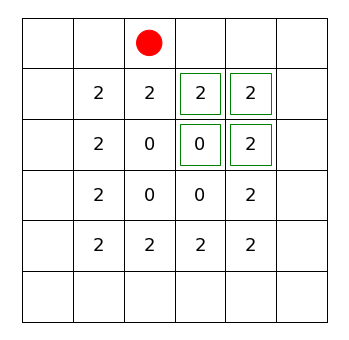

In [14]:
imMinesweeper(given6, hint = explanation6.explain(verbose = False)) 

### Enregistrement sur disque des images des explications

In [20]:
def imsExplanations(given, explanation):

    from copy import deepcopy

    l = []
    ESNlist = explanation.explainFull(verbose = False)

    g = deepcopy(given)

    for hint in ESNlist:
        
        (i, j), v = extractHint(hint[2])
        l.append(imMinesweeper(g, hint = hint))
        g[i,j] = V if v == 0 else M
        
    l.append(imMinesweeper(g))

    return l

#! mkdir images
def writeExplanations(ims, prefix):
    for i, im in enumerate(ims):
        im.save(f'{global_prefix}images/{prefix}-{i}.png', format = 'png')

def displayExplanations(prefix):
    display_images = displayImages.mpl if IN_COLAB else displayImages.cv # ou widgets
    return display_images(f'{global_prefix}images/{prefix}-')

Test

In [21]:
ims6 = imsExplanations(given6, explanation6)
writeExplanations(ims6, 'given6')
displayExplanations('given6')

#### Exemple 1

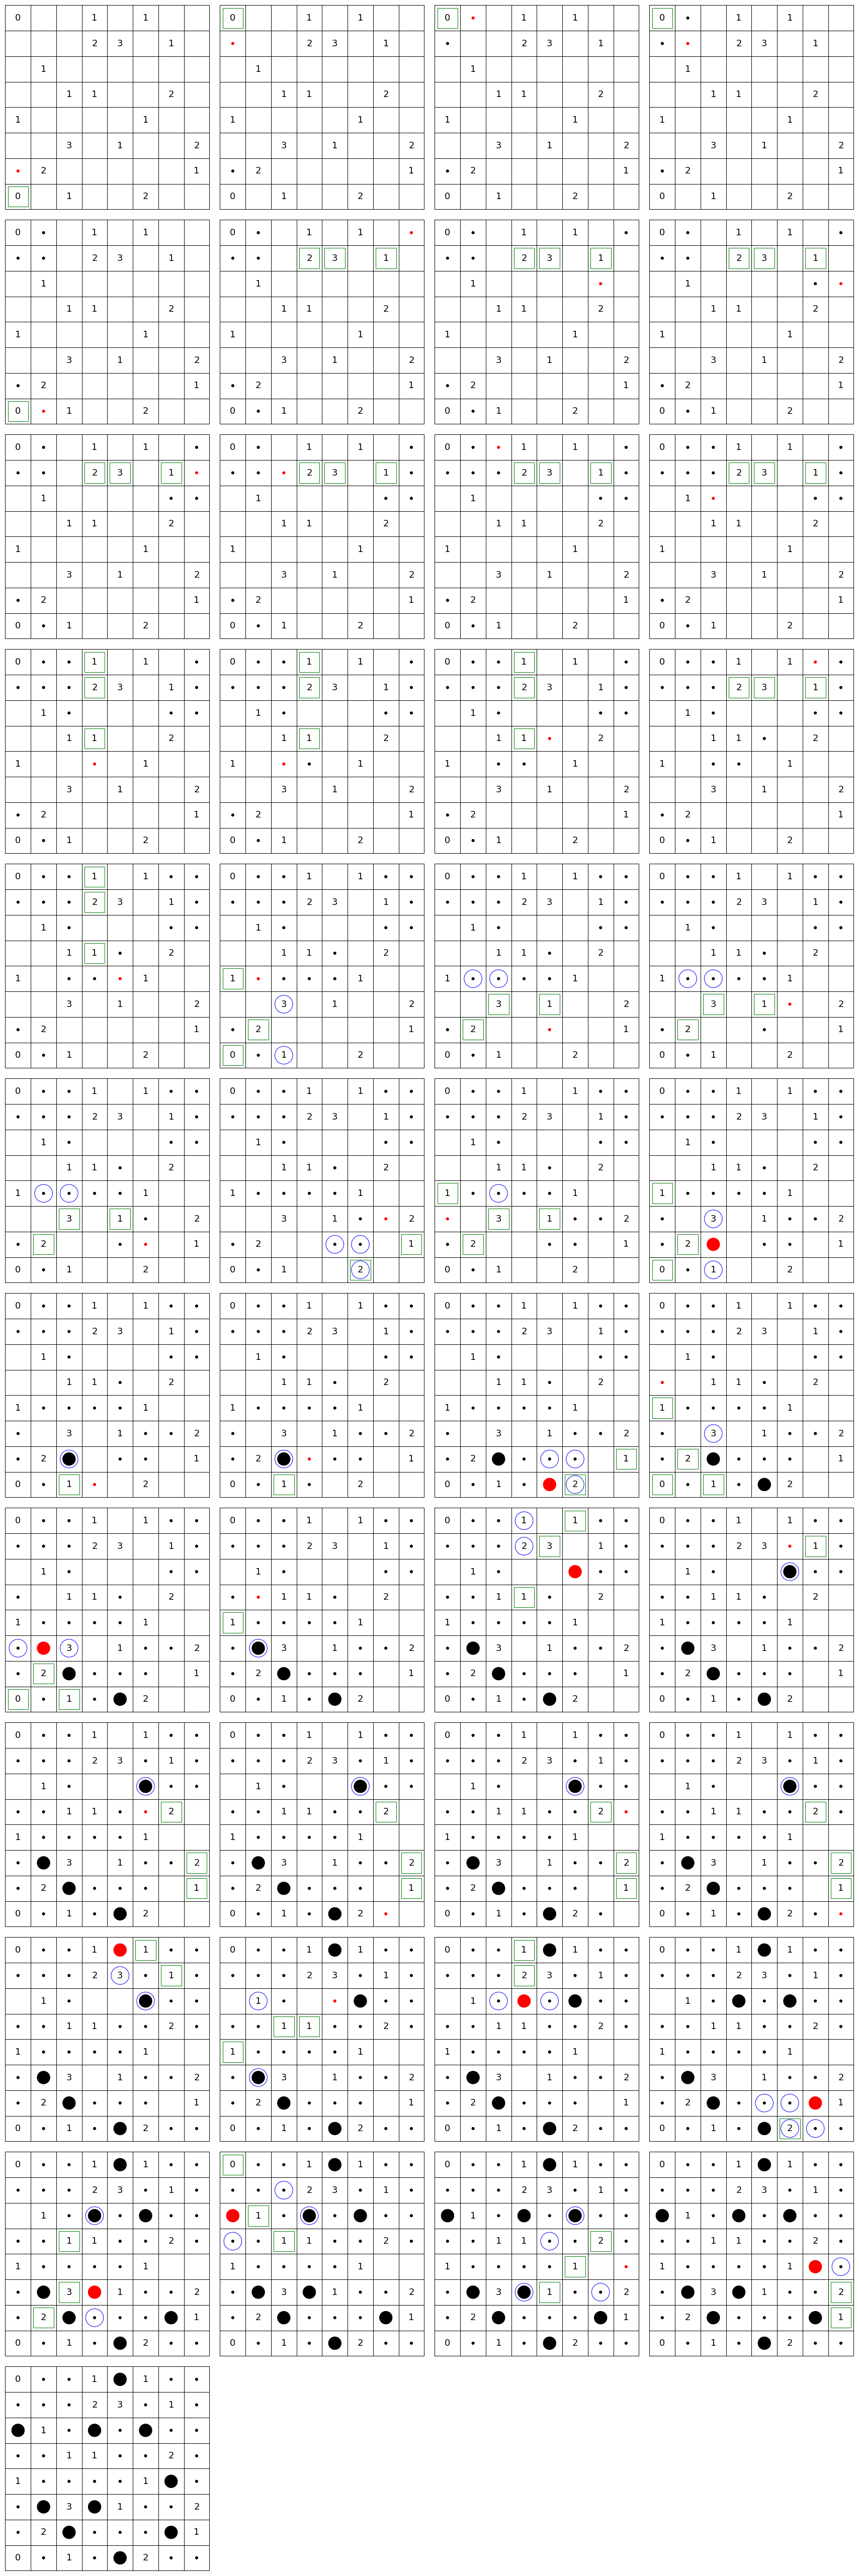

In [25]:
ims8 = imsExplanations(given8, explanation8) # 3 mns
writeExplanations(ims8, 'given8')
displayImages.concat(ims8, nbColonnes=4)

In [35]:
displayExplanations('given8')

#### Exemple 2

In [32]:
ims9 = imsExplanations(given9, explanation9)  # 8 mns
writeExplanations(ims9, 'given9')

In [36]:
displayExplanations('given9')

#### Exemple 3

In [31]:
ims10 = imsExplanations(given10, explanation10)  # 15 mns
writeExplanations(ims10, 'given10')

In [34]:
displayExplanations('given10')

#### Exemple 4

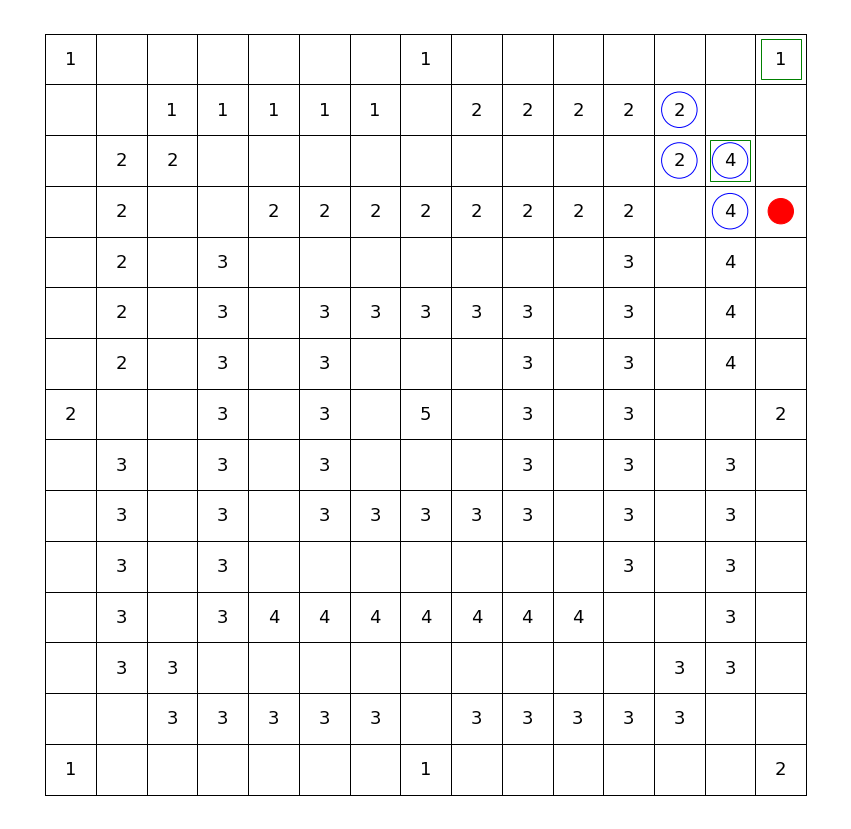

In [ ]:
imMinesweeper(given15, hint = explanation15.explain(verbose = False))  # 23 mns